# Week11 - Clustering Lab
- Create clusters for the following dataset
- Choose a meaningful cluster count
- Identify potential labels for each cluster

In [15]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd

def get_data():
    r = urllib2.urlopen("https://github.com/msaricaumbc/DS_data/blob/master/ds602/people_wiki.zip?raw=true").read()
    file = ZipFile(BytesIO(r))
    people_wiki_csv = file.open("people_wiki.csv")
    people = pd.read_csv(people_wiki_csv)
    people.drop('URI', inplace=True, axis=1)
    return people

people = get_data()
people.head()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [2]:
people

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...
42781,Motoaki Takenouchi,motoaki takenouchi born july 8 1967 saitama pr...
42782,"Alan Judge (footballer, born 1960)",alan graham judge born 14 may 1960 is a retire...
42783,Eduardo Lara,eduardo lara lozano born 4 september 1959 in c...
42784,Tatiana Faberg%C3%A9,tatiana faberg is an author and faberg scholar...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


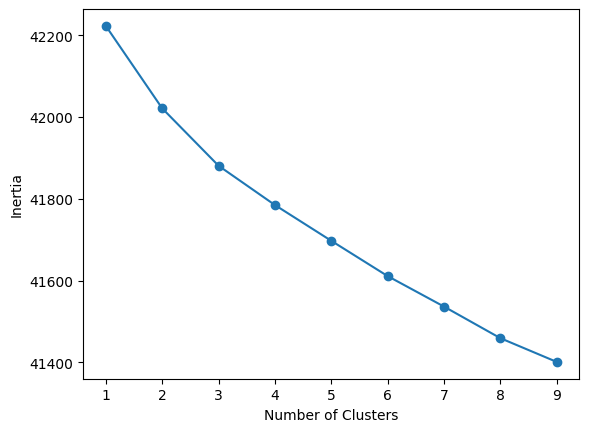

In [3]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
distortions = list()

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])
for i in range(1, 10):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Chosen 6 clusters

In [7]:
!pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# vectorize text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])

# cluster data
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X)

# get top words for each cluster
mode_words = {}
or_centr = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(6):
    mode_words[i] = [terms[ind] for ind in or_centr[i, :15]]



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
for i in range(6):
    print(f"Cluster {i} mode_words: {mode_words[i]}")

Cluster 0 mode_words: ['party', 'election', 'served', 'minister', 'law', 'member', 'elected', 'president', 'state', 'university', 'general', 'district', 'committee', 'government', 'council']
Cluster 1 mode_words: ['world', 'championships', 'won', 'championship', 'tour', 'team', 'olympics', 'race', 'racing', 'finished', 'champion', 'olympic', 'pga', 'event', 'marathon']
Cluster 2 mode_words: ['league', 'season', 'played', 'football', 'team', 'coach', 'games', 'club', 'player', 'baseball', 'game', 'career', 'cup', 'seasons', 'playing']
Cluster 3 mode_words: ['music', 'album', 'band', 'released', 'orchestra', 'jazz', 'song', 'records', 'songs', 'albums', 'new', 'recorded', 'performed', 'singer', 'solo']
Cluster 4 mode_words: ['university', 'new', 'research', 'art', 'book', 'work', 'published', 'professor', 'american', 'books', 'york', 'born', 'award', 'science', 'school']
Cluster 5 mode_words: ['film', 'theatre', 'television', 'films', 'series', 'award', 'actor', 'role', 'directed', 'fest

### chosen 5 clusters

In [11]:

    
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# vectorize text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])

# cluster data
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# get top words for each cluster
mode_words = {}
or_centr = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(5):
    mode_words[i] = [terms[ind] for ind in or_centr[i, :15]]



In [12]:
for i in range(5):
    print(f"Cluster {i} mode_words: {mode_words[i]}")

Cluster 0 mode_words: ['music', 'album', 'band', 'released', 'orchestra', 'jazz', 'song', 'records', 'songs', 'albums', 'new', 'recorded', 'performed', 'singer', 'solo']
Cluster 1 mode_words: ['league', 'season', 'team', 'played', 'football', 'coach', 'games', 'club', 'player', 'cup', 'won', 'championship', 'career', 'world', 'baseball']
Cluster 2 mode_words: ['university', 'new', 'research', 'art', 'book', 'work', 'published', 'professor', 'american', 'born', 'international', 'york', 'school', 'books', 'award']
Cluster 3 mode_words: ['party', 'election', 'minister', 'law', 'served', 'member', 'elected', 'state', 'president', 'district', 'committee', 'university', 'general', 'government', 'council']
Cluster 4 mode_words: ['film', 'theatre', 'television', 'films', 'series', 'award', 'actor', 'role', 'directed', 'festival', 'best', 'appeared', 'drama', 'comedy', 'actress']


Here If we choose 6 clusters ,we see that some words are not related in each cluster but in 5 clusters all the words match .Looks like they are in same department like pop music, research etc. Hence 5 clusters is appropriate one.

In [23]:
### labelling 5  clusters based on top words
labels = {}
labels[0] = "Music Band"
labels[1] = "Sports"
labels[2] = "Education"
labels[3] = "Government"
labels[4] = "Movies"

# assign labels to data
people['cluster'] = kmeans.labels_
people['label'] = people['cluster'].apply(lambda x: labels[x])

# print top words for each cluster and cluster labels
for i in range(5):
    print(f"Cluster {i} : {mode_words[i]}")
    
print(people[['name', 'text', 'label']])


Cluster 0 : ['music', 'album', 'band', 'released', 'orchestra', 'jazz', 'song', 'records', 'songs', 'albums', 'new', 'recorded', 'performed', 'singer', 'solo']
Cluster 1 : ['league', 'season', 'team', 'played', 'football', 'coach', 'games', 'club', 'player', 'cup', 'won', 'championship', 'career', 'world', 'baseball']
Cluster 2 : ['university', 'new', 'research', 'art', 'book', 'work', 'published', 'professor', 'american', 'born', 'international', 'york', 'school', 'books', 'award']
Cluster 3 : ['party', 'election', 'minister', 'law', 'served', 'member', 'elected', 'state', 'president', 'district', 'committee', 'university', 'general', 'government', 'council']
Cluster 4 : ['film', 'theatre', 'television', 'films', 'series', 'award', 'actor', 'role', 'directed', 'festival', 'best', 'appeared', 'drama', 'comedy', 'actress']
                                     name  \
0                           Digby Morrell   
1                          Alfred J. Lewy   
2                           Har